svm kernels in depth 


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
x = np.linspace(-5.0, 5.0 , 100)
y = np.sqrt(10 **2 - x **2)
y = np.hstack((y, -y))
x= np.hstack((x, x))

In [12]:
x1 = np.linspace(-5.0, 5.0 , 100)
y1 = np.sqrt(5 **2 - x1 **2)
y1 = np.hstack((y1, -y1))
x1= np.hstack((x1, -x1))

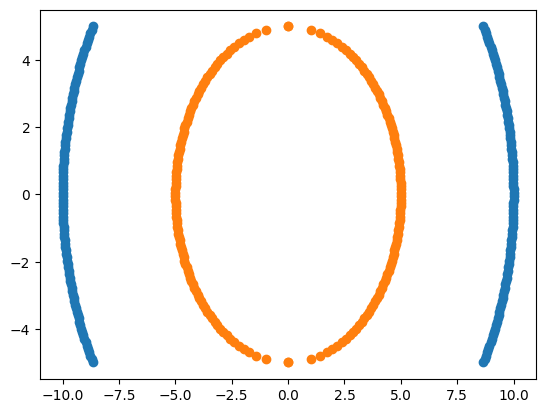

In [13]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [14]:
import pandas as pd 
df1 = pd.DataFrame (np.vstack((x, y)).T, columns=['x1', 'x2'])
df1['Y'] = 0
df2 = pd.DataFrame (np.vstack((x1, y1)).T, columns=['x1', 'x2'])
df2['Y'] = 1
df =  pd.concat([df1, df2], ignore_index=True)
df.head(5)

,x1,x2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [31]:
## indpendent and dependent variables
x = df.iloc[: , :2]
y = df.Y

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [34]:
import plotly.express as px

In [35]:
df['x1square'] = df.x1 ** 2
df['x2square'] = df.x2 ** 2 
df['x1x2'] = df.x1 * df.x2


In [36]:
px.scatter_3d(df, x='x1square', y='x2square', z='Y', color='Y', title='Data Points in 3D Space')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x1square=%{x}<br>x2square=%{y}<br>Y=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AAAAAAAAOUDAQMmvBgA4QLAXzbRGBT' ... '20RgU3QMJAya8GADhAAAAAAAAAOUA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AQAAAADAUkDQrw1U/v9SQBS6zFKuPl' ... '6zlKv/P8Dn1wYq/+8/AAAAAAAAAAA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                    'dtype': 'i1'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'x1square'}},
                         'yaxis': {'title': {'text': 'x2square'}},
                         'zaxis': {'title': {'text': 'Y'}}},
               'template': '...',
               'title': {'text': 'Data Points in 3D Space'}}
})

In [37]:
from sklearn.svm import SVC
svc =SVC(kernel='linear')

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = svc.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.44      1.00      0.61        44

    accuracy                           0.44       100
   macro avg       0.22      0.50      0.31       100
weighted avg       0.19      0.44      0.27       100

[[ 0 56]
 [ 0 44]]


c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.44

In [45]:
X = df[['x1','x2', 'x1square', 'x2square', 'x1x2']]
Y = df.Y

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [47]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = svc.predict(x_test)

In [49]:
accuracy_score(y_test, y_pred)

1.0